In [61]:
# visualization of the ROC and PRC curves following the feature selection

###############################################################################
# 10/28/20

'''
Objective: Figure quality ROC and PRC curves for MOT project 
Input:  Raw data, classifications, model outputs for plotting
Output: Visualization + code to integrate into the pipeline
'''
###############################################################################
# my major imports 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
path = os.getcwd()
###############################################################################


In [62]:
path

'/home/mskaro1/storage/Machine_Learning'

In [ ]:
'''
split data if not aready split:
X= pd.read_csv("~/storage/PanCancerAnalysis/ML_2019/Metastatic_loci_consolidated/one_hot_encoded_labels/TCGA-BRCA_metastatic_data_RNAseq.csv")
X.drop(X.columns[0], axis=1)
# Look at the shape of the data to construct the input layer. 
print('We have {} instances of data with {} variables'.format(*X.shape))


y = X[["Bone","Lung","Liver"]].to_numpy()
n_classes = y.shape[1]
patients = np.array(X.pop('barcode'))
# remove the features labels
X = X.drop(["Bone","Lung","Liver"], axis = 1) 

# Labels are the values we want to predict, retrun and pop them off after
# List of features for later use
feature_list = list(X.columns)
# Convert to numpy array
features = np.array(X)

X_train, X_test, y_train, y_test = train_test_split(X,
                                         y, 
                                         stratify = labels,
                                         test_size = 0.3, 
                                         random_state = RSEED)

'''

In [63]:
# Read in the data for the learning model


#X_train = # data for the model to train on
#X_test = # data for the model to test on
#y_train = # labels for the training set
#y_test = # labels for the testing set


X_train = pd.read_csv("/home/mskaro1/storage/Machine_Learning/TCGA-LIHC_metastatic_data_RNAseq_Lung_feature_selected_train.csv")
X_test =pd.read_csv("/home/mskaro1/storage/Machine_Learning/TCGA-LIHC_metastatic_data_RNAseq_Lung_feature_selected_test.csv")
y_train = np.array(X_train.pop('Lung'))
y_test = np.array(X_test.pop('Lung'))



In [64]:
print('We have {} instances of data with {} variables'.format(*X_train.shape))
print('We have {} instances of data with {} variables'.format(*X_test.shape))

We have 128 instances of data with 1000 variables
We have 69 instances of data with 1000 variables


In [65]:
# choose the model:RF classification
import random
RSEED = random.randint(1,100)
model = RandomForestClassifier(n_estimators=100, 
                               random_state=RSEED, 
                               max_features = 'sqrt', 
                               n_jobs=-1, verbose = 1)
# Fit training data
# this may change once marcus uses the IG algo, gpotta discuss today/tomorrow?, Also are we wrapping in Onevs rest or what?
model.fit(X_train, y_train) # or do we wrap before fit, or is it a different fit call? look at sklearn.documentation

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=77,
                       verbose=1)

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


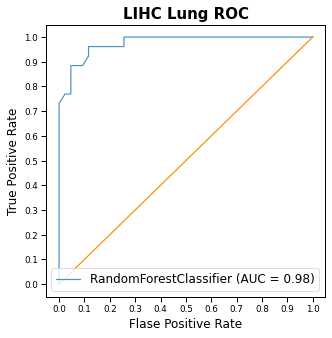

In [110]:
# ROC 
import seaborn as sns
sns.set_context("paper")

from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
fig = plt.figure(figsize=(5,5))
ax = plt.gca()
rfc_disp = plot_roc_curve(model, X_test, y_test, ax=ax, alpha=0.8)
plt.plot([0,1], [0,1], color='darkorange', linestyle='-')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=12)

plt.title('LIHC Lung ROC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
fig.savefig('LIHC_Lung_roc_curve.png')

In [67]:
# Compute the average precision score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score

y_score = model.predict_proba(X_test)[:,-1]

[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.0s finished


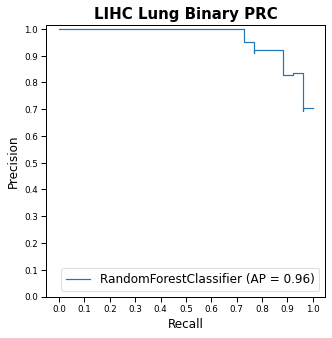

Average precision-recall score RF: 0.9644616613582131


In [112]:
from sklearn.metrics import average_precision_score, auc, roc_curve, precision_recall_curve

sns.set_context("paper")

fig = plt.figure(figsize=(5,5))
ax = plt.gca()
average_precision = average_precision_score(y_test, y_score, pos_label="Positive")
disp = plot_precision_recall_curve(model, X_test, y_test, ax =ax)

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=12)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=12)

plt.title('LIHC Lung Binary PRC', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')

plt.show()
print('Average precision-recall score RF: {}'.format(average_precision))
fig.savefig('LIHC_Lung_PRC_curve.png')

In [69]:
# DONE